In [4]:
#Analitica
import numpy as np
import pandas as pd
#Visualizacion de datos
import matplotlib.pyplot as plt

In [5]:
data_salary = pd.read_csv('C:/Users/misam/OneDrive/Escritorio/SalaryData.csv')

In [6]:
data_salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
#Extraccion de datos en las columnas x, y
x = data_salary.iloc[:,:-1].values # El -1 en python es agarrar el ultimo elemento
y = data_salary.iloc[:,1].values   # La posicion 1

In [8]:
#Años de experiencia
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
#Salario
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [10]:
#Importar la lubreia de division de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [11]:
#Dividir los datos de entrenaimento y prueba 80% entrenamiento y 20% de prueba
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [12]:
#Importando la libreria de regresion lineal
from sklearn.linear_model import LinearRegression

In [13]:
#Construir el modelo de regresion lineal
reg = LinearRegression()

In [14]:
reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
LinearRegression()

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred = reg.predict(x_test)
x_pred = reg.predict(x_train)

Training Set


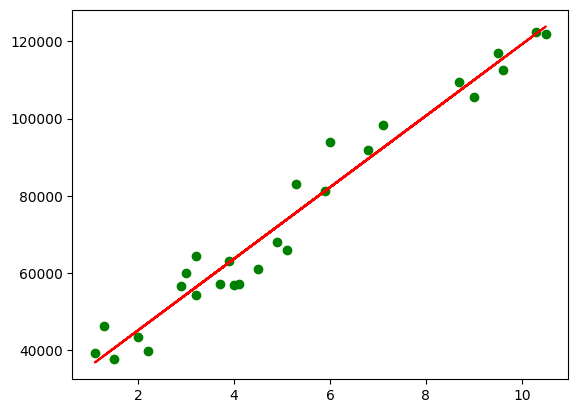

In [17]:
print("Training Set")
plt.scatter(x_train, y_train, color="green")
plt.plot(x_train,x_pred,color="red")
plt.show()

In [20]:
#Importar libreria de metricas del modelo de prediccion
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Metricas de evaluacion
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [25]:
print("===Metrica de evaluacion del modelo===")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f'MSE (Error Cuadratico Medio): {mse:.2f}')
print(f'RMSE (Raiz del Error Cuadrativo Medio): {mae:.2f}')
print(f"R2 Score: {r2:.4f}")


===Metrica de evaluacion del modelo===
MAE (Error Absoluto Medio): 6903.24
MSE (Error Cuadratico Medio): 63945270.17
RMSE (Raiz del Error Cuadrativo Medio): 6903.24
R2 Score: 0.8971


R= Significa que el 

In [26]:
#Prueba el modelo
print("Prueba del modelo entrenado")

#Valores de ejemplo para probar
valores_ejemplo = [1, 3, 5, 8, 12]

for valor in valores_ejemplo:
    prediccion = reg.predict([[valor]])[0]
    print(f" - Si X = {valor:2d} -> Salario predicho: ${prediccion:,.2f}")

Prueba del modelo entrenado
 - Si X =  1 -> Salario predicho: $35,944.42
 - Si X =  3 -> Salario predicho: $54,442.78
 - Si X =  5 -> Salario predicho: $72,941.13
 - Si X =  8 -> Salario predicho: $100,688.66
 - Si X = 12 -> Salario predicho: $137,685.37


In [27]:
#Importar libreria
import joblib

#Guardar el modelo entrenado
joblib.dump(reg, ('modelo_salario.pkl'))
print("Modelo guardado como 'modelo_salario.pkl'")

# Funcion para cargar y usar el modelo posteriormente entrenado
def cargarModeloYPredecir(x_val, ruta_modelo='modelo_salario.pkl'):
    modelo = joblib.load(ruta_modelo)
    prediccion = modelo.predict([[x_val]])[0]
    return prediccion


Modelo guardado como 'modelo_salario.pkl'


In [36]:
print("Probando modelo cargado")
x_prueba = 18
pred_cargado = cargarModeloYPredecir(x_prueba)
print(f" = {x_prueba} Prediccion: ${pred_cargado:,.2f}")

Probando modelo cargado
 = 18 Prediccion: $193,180.43
